# Mạng nơ ron đa tầng, đơn lớp, đa lớp

- Họ và tên: Kim Minh Thắng
- Mã số sinh viên: B2007210

## 1. Thực hành 3

Tổng hợp các mã lệnh được trình bày trong phần trên để xây dựng một mạng nơ ron perceptron đa tầng (2 tầng), 2 lớp cho bài toán XOR với dữ liệu huấn luyện như bên dưới

```python
X = tf.constant([[0.0, 0],
                [0, 1],
                [1, 0],
                [1, 1]])
y = tf.constant([[0.0, 0],
                [0, 1],
                [0, 1],
                [0, 0]])
```

### 1.1 Import thư viện

In [44]:
import tensorflow as tf

### 1.2 Khai báo các layers

- Layer 1: Sử dụng activation Relu
- Layer 2: Sử dụng activation Sigmoid

In [45]:
@tf.function
def layer1(X, W, B):
    return tf.nn.relu(tf.matmul(X, W) + B)


@tf.function
def layer2(X, W, B):
    return tf.nn.sigmoid(tf.matmul(X, W) + B)

### 1.3 Khai báo hàm predict

In [46]:
@tf.function
def predict(X, W1, B1, W2, B2):
    return layer2(layer1(X, W1, B1), W2, B2)

### 1.4 Khai báo hàm loss

Sử dụng hàm loss là binary crossentropy

In [47]:
@tf.function
def loss(y_hat, y):
    return - tf.reduce_mean(y * tf.math.log(y_hat) + (1 - y) * tf.math.log(1 - y_hat))

### 1.5 Train mô hình

In [48]:
x = tf.constant([[0.0, 0],
                 [0, 1],
                 [1, 0],
                 [1, 1]])

y = tf.constant([[0.0, 0],
                 [0, 1],
                 [0, 1],
                 [0, 0]])

W1 = tf.Variable(tf.random.normal((2, 2), dtype=tf.float32))
B1 = tf.Variable(tf.random.normal((1, 2), dtype=tf.float32))

W2 = tf.Variable(tf.random.normal((2, 2), dtype=tf.float32))
B2 = tf.Variable(tf.random.normal((1, 2), dtype=tf.float32))

learning_rate = 0.1
epochs = 1000

loss_history = []

for epoch in range(epochs):
    with tf.GradientTape() as tape:
        y_hat = predict(x, W1, B1, W2, B2)
        loss_value = loss(y_hat, y)
        loss_history.append(loss_value)

    if epoch % 100 == 0:
        print("Epoch: {}, Loss: {}".format(epoch, loss_value))

    grads = tape.gradient(loss_value, [W1, B1, W2, B2])
    W1.assign_sub(learning_rate * grads[0])
    B1.assign_sub(learning_rate * grads[1])
    W2.assign_sub(learning_rate * grads[2])
    B2.assign_sub(learning_rate * grads[3])


Epoch: 0, Loss: 1.2050633430480957
Epoch: 100, Loss: 0.4454892873764038
Epoch: 200, Loss: 0.33446598052978516
Epoch: 300, Loss: 0.293564110994339
Epoch: 400, Loss: 0.2774755656719208
Epoch: 500, Loss: 0.26830509305000305
Epoch: 600, Loss: 0.26249960064888
Epoch: 700, Loss: 0.2585397958755493
Epoch: 800, Loss: 0.2556711435317993
Epoch: 900, Loss: 0.25351521372795105


### 1.6 Vẽ đồ thị loss

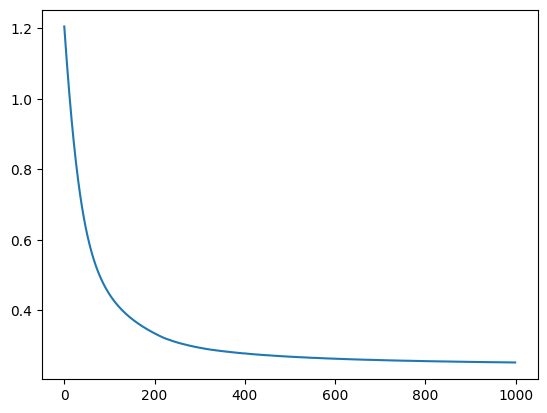

In [49]:
import matplotlib.pyplot as plt

plt.plot(loss_history)

## 2. Thực hành 4

Xây dựng một mạng nơ ron perceptron 2 tầng, 2 lớp. Đọc tập dữ liệu trong file data.csv, chia dữ liệu thành 2 phần 80% - 20%, dùng 80% huấn và 20% còn lại để đánh giá

### 2.1 Import thư viện

In [50]:
import tensorflow as tf
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

### 2.2 Đọc dữ liệu và xử lý dữ liệu

In [51]:
df = pd.read_csv('./data.csv')
df.head()

,X1,X2,Classe
0,0.204,0.834,0
1,0.222,0.730,0
2,0.298,0.822,0
3,0.450,0.842,0
4,0.412,0.732,0


Tách X và Y

In [52]:
X = df[['X1', 'X2']].values
X.shape

(23, 2)

In [53]:
Y = df[['Classe']].values
Y.shape

(23, 1)

Chuyển Y về dạng one-hot

In [54]:
one = OneHotEncoder()

y_encoded = one.fit_transform(Y).toarray()
y_encoded.shape

(23, 2)

Tách dữ liệu train và test

In [55]:
x_train, x_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2)

### 2.3 Khai báo các layers, hàm predict và hàm loss

In [56]:
@tf.function
def layer1(X, W, B):
    return tf.nn.relu(tf.matmul(X, W) + B)


@tf.function
def layer2(X, W, B):
    return tf.nn.sigmoid(tf.matmul(X, W) + B)


@tf.function
def predict(X, W1, B1, W2, B2):
    return layer2(layer1(X, W1, B1), W2, B2)


@tf.function
def loss(y_hat, y):
    return - tf.reduce_mean(y * tf.math.log(y_hat) + (1 - y) * tf.math.log(1 - y_hat))

### 2.4 Train mô hình

In [57]:
x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)

x_test = tf.convert_to_tensor(x_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

W1 = tf.Variable(tf.random.normal((2, 2), dtype=tf.float32))
B1 = tf.Variable(tf.random.normal((1, 2), dtype=tf.float32))

W2 = tf.Variable(tf.random.normal((2, 2), dtype=tf.float32))
B2 = tf.Variable(tf.random.normal((1, 2), dtype=tf.float32))

learning_rate = 0.1
epochs = 1000

loss_history = []

for epoch in range(epochs):
    with tf.GradientTape() as tape:
        y_hat = predict(x_train, W1, B1, W2, B2)
        loss_value = loss(y_hat, y_train)
        loss_history.append(loss_value)

    if epoch % 100 == 0:
        print("Epoch: {}, Loss: {}".format(epoch, loss_value))

    grads = tape.gradient(loss_value, [W1, B1, W2, B2])
    W1.assign_sub(learning_rate * grads[0])
    B1.assign_sub(learning_rate * grads[1])
    W2.assign_sub(learning_rate * grads[2])
    B2.assign_sub(learning_rate * grads[3])

Epoch: 0, Loss: 0.8390517830848694
Epoch: 100, Loss: 0.7276891469955444
Epoch: 200, Loss: 0.7143039703369141
Epoch: 300, Loss: 0.7069379687309265
Epoch: 400, Loss: 0.7022985219955444
Epoch: 500, Loss: 0.6991238594055176
Epoch: 600, Loss: 0.6968280076980591
Epoch: 700, Loss: 0.6951014995574951
Epoch: 800, Loss: 0.6937652230262756
Epoch: 900, Loss: 0.6927077770233154


### 2.5 Đánh giá mô hình

In [58]:
y_hat = predict(x_test, W1, B1, W2, B2)
y_hat = np.argmax(y_hat, axis=1)

y_test_decoded = np.argmax(y_test, axis=1)

acc = np.mean(y_hat == y_test_decoded)

print("Accuracy: {}".format(acc))

Accuracy: 0.0


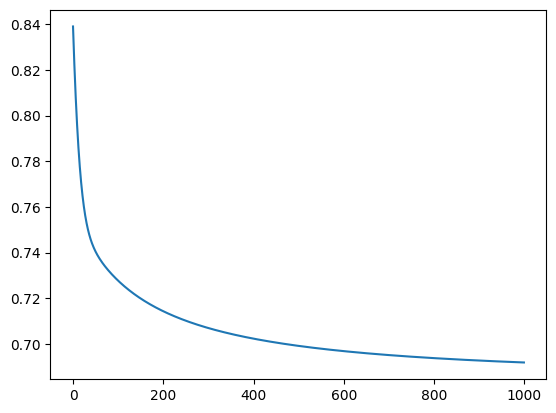

In [59]:
from matplotlib import pyplot as plt

plt.plot(loss_history)

## 3. Thực hành 5

- Xây dựng một mạng nơ ron MLP xử lý tập dữ liệu: [https://archive.ics.uci.edu/ml/machine-learningdatabases/character-trajectories](https://archive.ics.uci.edu/ml/machine-learningdatabases/character-trajectories)
- Chia dữ liệu thành 2 phần 80% - 20%, dùng 80% huấn và 20% còn lại để đánh giá

### 3.1 Import thư viện

In [60]:
import numpy as np
import tensorflow as tf
import pandas as pd

from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

mat_file = loadmat('./mixoutALL_shifted.mat')

### 3.2 Xử lý dữ liệu

Xem x, y, z như tọa độ của một điểm trong không gian 3 chiều, ta tính khoảng các từ điểm này đến gốc tọa độ

In [61]:
X = mat_file['mixout'][0]

X = X.tolist()

X = [(x[0]**2 + x[1]**2 + x[2]**2) ** (1/2) for x in X]

X = [x.tolist() + [0.0] * (205 - len(x)) for x in X]

X = np.asarray(X)

pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,204
0,0.0,0.0,0.0,0.597959,0.744284,0.829920,0.857604,0.846489,0.816081,0.780590,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.565986,0.750087,0.890253,0.972216,1.002991,1.002084,0.989906,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.620364,0.794987,0.925596,1.013903,1.069936,1.097143,1.095549,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.961889,1.221480,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.816197,1.061265,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
Y = mat_file['consts']['charlabels'][0][0][0]

Y = [[y] for y in Y]
Y = np.asarray(Y)

one = OneHotEncoder()

Y = one.fit_transform(Y).toarray()

pd.DataFrame(Y).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

### 3.3 Khai báo các layers, hàm predict và hàm loss

```mermaid
flowchart LR
    subgraph layer1 [layer1]
        matmul1((matmul)) --> add1((+))
        add1 --> relu1((relu))
    end

    subgraph layer2 [layer2]
        matmul2((matmul)) --> add2((+))
        add2 --> relu2((relu))
    end

    subgraph layer3 [layer3]
        matmul3((matmul)) --> add3((+))
        add3 --> softmax3((softmax))
    end

    X((X)) --> matmul1
    W1((W1)) --> matmul1
    B1((B1)) --> add1

    relu1 --> matmul2
    W2((W2)) --> matmul2
    B2((B2)) --> add2

    relu2 --> matmul3
    W3((W3)) --> matmul3
    B3((B3)) --> add3

    softmax3 --> y_pred((y_pred))
```

In [64]:
@tf.function
def layer1(X, W, B):
    return tf.nn.relu(tf.matmul(X, W) + B)


@tf.function
def layer2(X, W, B):
    return tf.nn.sigmoid(tf.matmul(X, W) + B)

@tf.function
def layer3(X, W, B):
    return tf.nn.softmax(tf.matmul(X, W) + B)


@tf.function
def predict(X, W1, B1, W2, B2, W3, B3):
    return layer3(layer2(layer1(X, W1, B1), W2, B2), W3, B3)


@tf.function
def loss(y_hat, y):
    epsillon = tf.constant(1e-7, dtype=tf.float32)
    return -tf.reduce_mean(tf.reduce_sum(y * tf.math.log(y_hat + epsillon), axis=1))

### 3.4 Train mô hình

In [65]:
x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)

x_test = tf.convert_to_tensor(x_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

In [66]:
W1 = tf.Variable(tf.random.normal((X.shape[1], Y.shape[1]), dtype=tf.float32))
B1 = tf.Variable(tf.random.normal((1, Y.shape[1]), dtype=tf.float32))

W2 = tf.Variable(tf.random.normal((Y.shape[1], Y.shape[1]), dtype=tf.float32))
B2 = tf.Variable(tf.random.normal((1, Y.shape[1]), dtype=tf.float32))

W3 = tf.Variable(tf.random.normal((Y.shape[1], Y.shape[1]), dtype=tf.float32))
B3 = tf.Variable(tf.random.normal((1, Y.shape[1]), dtype=tf.float32))

learning_rate = 0.1
epochs = 10000

loss_history = []

for epoch in range(epochs):
    with tf.GradientTape() as tape:
        y_hat = predict(x_train, W1, B1, W2, B2, W3, B3)
        loss_value = loss(y_hat, y_train)
        loss_history.append(loss_value)

    if epoch % 1000 == 0:
        print("Epoch: {}, Loss: {}".format(epoch, loss_value))

    grads = tape.gradient(loss_value, [W1, B1, W2, B2, W3, B3])
    W1.assign_sub(learning_rate * grads[0])
    B1.assign_sub(learning_rate * grads[1])
    W2.assign_sub(learning_rate * grads[2])
    B2.assign_sub(learning_rate * grads[3])
    W3.assign_sub(learning_rate * grads[4])
    B3.assign_sub(learning_rate * grads[5])

Epoch: 0, Loss: 5.495841979980469
Epoch: 1000, Loss: 1.0724273920059204
Epoch: 2000, Loss: 0.7169781923294067
Epoch: 3000, Loss: 0.5738096833229065
Epoch: 4000, Loss: 0.4982617497444153
Epoch: 5000, Loss: 0.44345054030418396
Epoch: 6000, Loss: 0.395187646150589
Epoch: 7000, Loss: 0.36296457052230835
Epoch: 8000, Loss: 0.33608296513557434
Epoch: 9000, Loss: 0.30956998467445374


### 3.5 Đánh giá mô hình

In [67]:
y_hat = predict(x_test, W1, B1, W2, B2, W3, B3)

y_hat = np.argmax(y_hat, axis=1)

y_test_decoded = np.argmax(y_test, axis=1)

acc = np.mean(y_hat == y_test_decoded)

print("Accuracy: {}".format(acc))

Accuracy: 0.8566433566433567


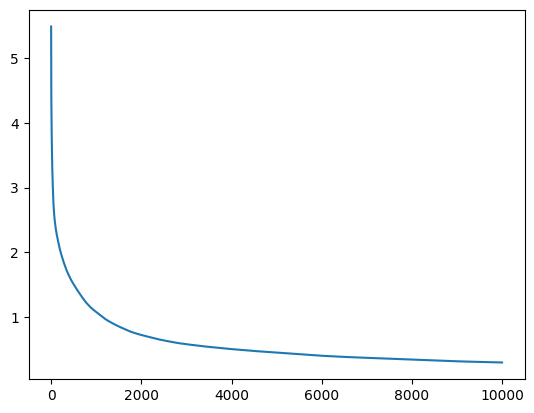

In [68]:
from matplotlib import pyplot as plt

plt.plot(loss_history)